# *IPR | Graphics - Exercise* : Images

Student name: *[Todo]* <br>
Student ID: *[Todo]* <br>

This is the handout and the exercise notebook for the IPR Graphics Exercise. <br>
You have to solve 3 tasks in Python and Java summing to 12 points. <br>
Deadline: **23.12.2021, 10:00**


If you have any questions, please contact the tutors or the instructor. <br>
Instructor: David Schedl, [david.schedl@fh-hagenberg.at](mailto:david.schedl@fh-hagenberg.at) <br>

## Pixels of an image

Let's start simple with a binary image (0 or 1). <br>
We only use 0 and 1 for the pixels, the datatype, however, is `int` and not `bool`. <br>

Furthermore, we can `import ipr` to get access to the `imshow` function for displaying images. 
Make sure that this Jupyter-notebook file (`.ipynb`) is in the same directory as the `ipr.py` file!

0


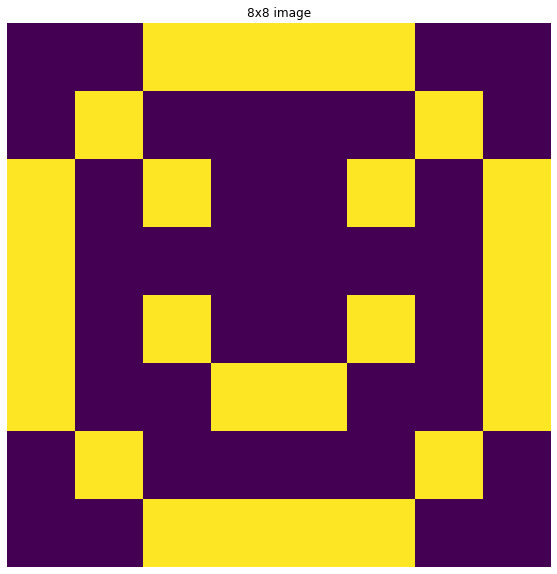

[1, 0, 1, 0, 0, 1, 0, 1]
<class 'int'>


In [120]:
# define the pixels of a binary (0/1) 8x8 image with a smiley face
pixels_binary = [
#col:0  1  2  3  4  5  6  7 
    [0, 0, 1, 1, 1, 1, 0, 0], # row 0  
    [0, 1, 0, 0, 0, 0, 1, 0], # row 1
    [1, 0, 1, 0, 0, 1, 0, 1], # row 2
    [1, 0, 0, 0, 0, 0, 0, 1], # row 3
    [1, 0, 1, 0, 0, 1, 0, 1], # row 4
    [1, 0, 0, 1, 1, 0, 0, 1], # row 5
    [0, 1, 0, 0, 0, 0, 1, 0], # row 6
    [0, 0, 1, 1, 1, 1, 0, 0]  # row 7
]

print(pixels_binary[6][7])

import ipr 
ipr.imshow("8x8 image", pixels_binary)

# Note that row is the v or y axis and column is the u or x axis.
print(pixels_binary[2]) # retrieves row 2 (the eyes)
print(type(pixels_binary[0][0])) # the datatype is integer!

## Grayscale

Let's extend our image to grayscale by using an extended range. <br>
Typically, a Byte (8 bit) is used for storing a pixel, thus the range is 0 to 255. <br> 

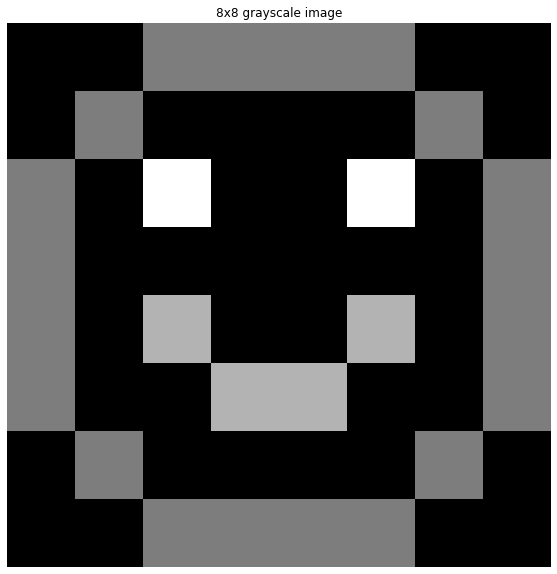

[125, 0, 255, 0, 0, 255, 0, 125]


In [121]:
# define the pixels of an 8-bit grayscale (0-255) image with a smiley face
pixels_grayscale = [
#col:  0    1    2    3    4    5    6    7 
    [  0,   0, 125, 125, 125, 125,   0,   0], # row 0  
    [  0, 125,   0,   0,   0,   0, 125,   0], # row 1
    [125,   0, 255,   0,   0, 255,   0, 125], # row 2
    [125,   0,   0,   0,   0,   0,   0, 125], # row 3
    [125,   0, 180,   0,   0, 180,   0, 125], # row 4
    [125,   0,   0, 180, 180,   0,   0, 125], # row 5
    [  0, 125,   0,   0,   0,   0, 125,   0], # row 6
    [  0,   0, 125, 125, 125, 125,   0,   0]  # row 7
]

import ipr 
ipr.imshow("8x8 grayscale image", pixels_grayscale, cmap="gray")

# Note that row is the v or y axis and column is the u or x axis.
print(pixels_grayscale[2]) # retrieves row 2 (the eyes)

## Switch to Colors

In Python we handle colors by extending our 2D lists with 3 values (RGB) per pixel. <br>
Thus, every pixel is an array of 3 color values. <br>
The lines below convert our grayscale image to a color image. <br>

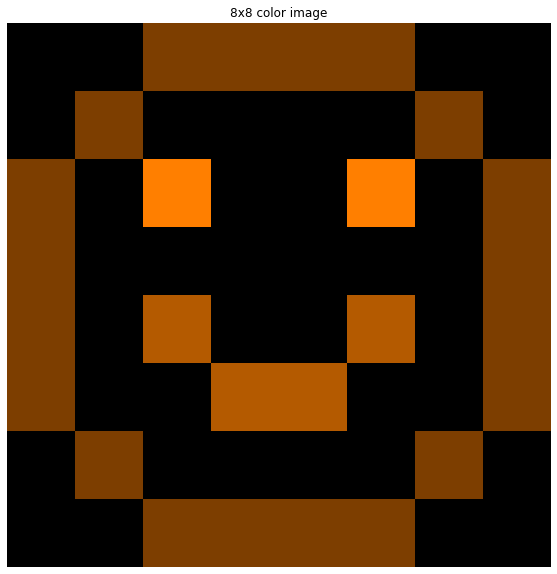

[[125, 62.5, 0], [0, 0.0, 0], [255, 127.5, 0], [0, 0.0, 0], [0, 0.0, 0], [255, 127.5, 0], [0, 0.0, 0], [125, 62.5, 0]]


In [122]:
# convert grayscale to color 
pixels_color = []
for row in pixels_grayscale:
    row_color = []
    for pixel in row:
        row_color.append([pixel, pixel/2, 0]) # yellowish color (red + green = yellow; no blue)
    pixels_color.append(row_color)

ipr.imshow("8x8 color image", pixels_color)
print(pixels_color[2]) # retrieves row 2 (the eyes)

## A function to create a uniform color image

Let's create a function to create an image filled with a uniform color. <br>

In [123]:
# make_image (long version)
def make_image(width: int, height: int, color: list = [0, 0, 0]) -> list:
    """
    Create a new image of the given width and height.
    The image is filled with color.
     Args:
        width (int): width of the image
        height (int): height of the image
        color (list, optional): uniform color for initing the image. Defaults to [0,0,0] (black).

    Returns:
        list: the new image
    """
    pixels = []
    for r in range(height):  # rows
        row = []
        for c in range(width):  # columns
            row.append(color)
        pixels.append(row)
    return pixels


img = make_image(8, 10)
# ipr.imshow(f"empty image {len(img[0])}x{len(img)}", img)
# print(img[2])

## Pythonic (Python style): List Comprehensions

When programming, we often have for loops to transform one type of data into another. As a simple example, consider the following code that computes square numbers:
```python
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x ** 2)
```

You can make this code simpler using a list comprehension: 
```python
nums = [0, 1, 2, 3, 4]
squares = [x ** 2 for x in nums]
```
Note that list comprehensions can get quite complex and obfuscated (they can be nested and also contain if conditions), so they might be hard to interpret sometimes! Please use, what is easier for you to understand. <br>

We can dramatically shorten the code of `make_image` by using list comprehensions. <br>

In [124]:
# make_image (shortened with list comprehensions)
def make_image(width, height, color=[0,0,0]):
    """
    Create a new image of the given width and height.
    The image is filled with color.
     Args:
        width (int): width of the image
        height (int): height of the image
        color (list, optional): uniform color for initing the image. Defaults to [0,0,0] (black).

    Returns:
        list: the new image
    """
    return [[color for c in range(width)] for r in range(height)] # only one line now!


img = make_image(8, 10)
#ipr.imshow(f"empty image {len(img[0])}x{len(img)}", img)
#print(img[2])

## Encode an RGB pixel in one 32-bit integer value

In Java RGB pixels are encoded in 32-bit integers for efficiency.
We can also use this bitwise-encoding in Python! <br>
Let's test it below, but we don't change our image format. <br>
We stick to a 3D array (a list of lists of RGB lists) in Python. <br>

In [125]:
r, g, b = 0xFF, 0x64, 0x0B # red, green, blue
print(f"red: \t{r:d} \t0x{r:X} \t0b{r:08b}") # print in a decimal, hexadecimal and binary number system
print(f"green: \t{g:d} \t0x{g:X} \t0b{g:08b}")
print(f"blue: \t{b:d} \t0x{b:X} \t0b{b:08b}")


rgb = 0xFF640B # 24-bit representation of the color
print(f"RGB: \t{rgb:d} \t0x{rgb:X} \t0b{rgb:024b}")

red: 	255 	0xFF 	0b11111111
green: 	100 	0x64 	0b01100100
blue: 	11 	0xB 	0b00001011
RGB: 	16737291 	0xFF640B 	0b111111110110010000001011


## Bitwise Operations

Just like Java, Python has built-in functions to perform bitwise operations. <br>
You'll see a few examples below. For further details and explanations look at [this blog](https://realpython.com/python-bitwise-operators/#why-use-binary).

In [126]:
a = 0b10011100
b = 0b00110100
print(f"a \t{a:08b}")
print(f"b \t{b:08b}")
bit_or = a | b # bitwise OR (|)
bit_and = a & b # bitwise AND (&)
print( f"OR  \t{bit_or:08b}" ) 
print( f"AND \t{bit_and:08b}" )
print(f"-------------------")


bit = 0b100111
print(f"bit \t{bit:08b}")
bit_left = bit << 1 # bitwise shift left (<<)
bit_right = bit_left >> 1 # bitwise shift right (>>)
print( f"<<1 \t{bit_left:08b}" )
print( f">>1 \t{bit_right:08b}" )
print(f"-------------------")



# use OR and left shift to combine three colors (8 bits each) into one 24-bit color
r, g, b = 0xFF, 0x64, 0x0B # red, green, blue
rgb = r << 16 | g << 8 | b # 24-bit representation of the color
print(f"RGB: \t{rgb:d} \t0x{rgb:X} \t0b{rgb:024b}")

a 	10011100
b 	00110100
OR  	10111100
AND 	00010100
-------------------
bit 	00100111
<<1 	01001110
>>1 	00100111
-------------------
RGB: 	16737291 	0xFF640B 	0b111111110110010000001011


## _Task 01_: Implement a `get_pixel` and `set_pixel` function [1 point]

- Implement a function `get_pixel` that takes u,v coordinates and returns the corresponding pixel value.
- Implement a function `set_pixel` that takes u,v coordinates and a pixel value and sets the corresponding pixel value in the image.
<br> Make sure that you apply a boundary check to the u,v coordinates and handle invalid coordinates gracefully.

**NOTE:** Don't change the `make_image` function. You do not need to use bitwise operations in Python!

[0, 255, 0]
Your chosen coordinates are out of range.
None
[0, 255, 0]
Your chosen coordinates are out of range.


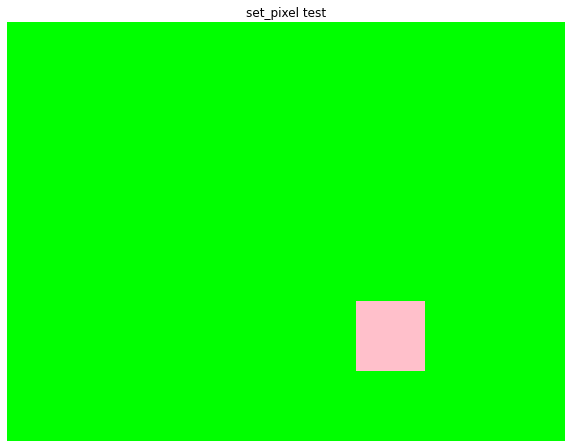

In [127]:
import ipr
import math

black = [0,0,0]
white = [255,255,255]
red = [255,0,0]
green = [0,255,0]
blue = [0,0,255]
yellow = [255,255,0]
purple = [100,0,100]
pink = [255,192,203]

# Bild wird erstellt
def make_image(u:int, v:int, color=black) -> list: # u = width, v = height
        img_color = []

        # Laenge des Bildes
        for _ in range(v):
            pixel_color = []

            # Breite des Bildes
            for _ in range(u):
                pixel_color.append(color)

            img_color.append(pixel_color)

        return img_color


# Fuellt die Pixel mit Farbe
def set_pixel(img: list, u:int, v:int, color:pink) -> list:

    # WENN der Pixel in dieser Range liegt...
    if u < len(img[0]) and v < len(img):

        # ...DANN fuelle den Pixel mit Farbe aus
        img [v][u] = color

    # ANDERNFALLS printe einen Error aus
    else:
        print("Your chosen coordinates are out of range.")

    # Ausgabe
    return img

# Waehlt einen farbigen Pixel aus
def get_pixel(img: list,u: int,v: int) -> list:
  
    pixel_color = []

    # WENN der Pixel in dieser Range liegt...
    if u < len(img[0]) and v < len(img):

       # ...DANN gib den Pixel retour
       return img [v][u]

    #ANDERNFALLS printe einen Error aus
    else:
        print("Your chosen coordinates are out of range.")


image = make_image(8, 6, green)
print( get_pixel(image,0,0) ) # should be [128,0,255]!
print( get_pixel(image,4,10) ) # invalid index. Return value should be None or empty list!

u,v = 1,1

set_pixel(image,5,4,pink)
print(get_pixel(image,u,v)) # should be [0,100,0], now!
set_pixel(image,10,2,white) # invalid index. should do nothing!
ipr.imshow("set_pixel test", image) # image should be purple with a green pixel in the middle!

## _Task 02_: Implement a function to create a horizontal gradient image [2 points]

The function `make_gradient_image` creates an image of a specific width and height. 
The image contains a  horizontal gradient (from left to right). `color1` is on the left side of the image, `color2` is on the right edge of the image. In-between pixels are interpolated linearly between the two colors (e.g., 50% of color1 and 50% of color2 in the center).

**Bonus:** [1/2 Extra-Point] The function can create a vertical and horizontal gradient. Use a boolean parameter to decide which gradient to create. 

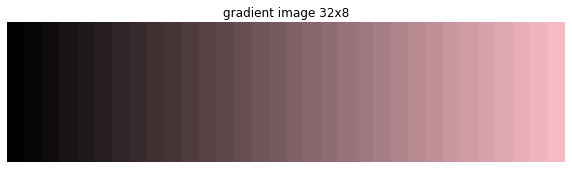

In [128]:
def make_gradient_image(u:int, v:int, color1=white, color2=black, m_v_g=False) -> list:

    # Horizontaler Farbverlauf

    if not m_v_g:

        radiant_image = []

        for _ in range(v):
            row_color = []

            for i in range(u):
                color = []

                # Dieser Codeabschnitt beschreibt, wie die Farbe 1 in die Farbe 2 gefaded wird

                for j in range(len(color1)):
                    color.append(color1[j] + (color2[j] - color1[j]) * i / u)

                row_color.append(color)
            radiant_image.append(row_color)

        # Ausgabe

        return radiant_image

    # Vertikaler Farbverlauf

    else:
        radiant_image = []

        for i in range(u):
            row_color = []

            for _ in range(v):
                color = []

                # Dieser Codeabschnitt beschreibt, wie die Farbe 1 in die Farbe 2 gefaded wird

                for j in range(len(color1)):
                    color.append(color1[j] + (color2[j] - color1[j]) * i / u)

                row_color.append(color)
            radiant_image.append(row_color)

        # Ausgabe

        return radiant_image


make_vertical_gradiant = False # set this boolean to True or False to change the gradient layout

image = make_gradient_image(32, 8, black, pink, make_vertical_gradiant)
ipr.imshow(f"gradient image {len(image[0])}x{len(image)}", image) # gradient from yellow on the left to blue on the right

## _Task 03_: Implement a function to create a checkerboard image [2 points]

Implement the function `make_checkerboard_image` with the parameters as defined below.
The resulting image shows a checkerboard (the board you know from the game chess) and squares using `color1` and `color2` alternatingly. 
Additionally the size of the squares can be controlled by the parameter `checker_size`. A square size of N means that one square is NxN pixels large.


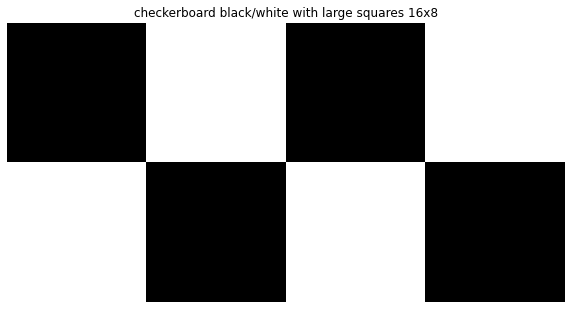

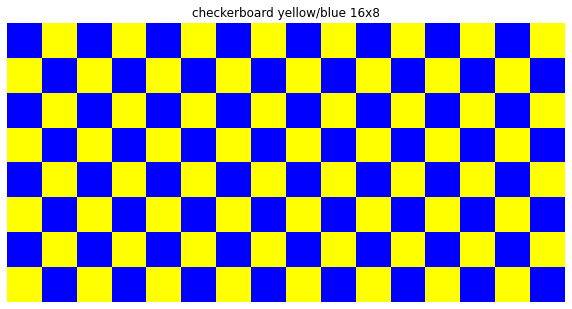

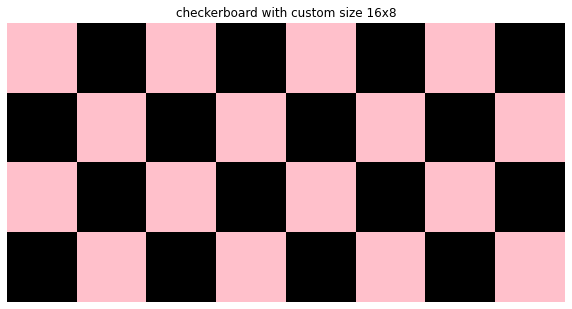

In [129]:
def make_checkerboard_image(u:int, v:int, color1=black, color2=white, c_s:int=1) -> list:

    checkerboard_color = []

    for j in range(v):
        pixel_color = []

        # Dieser Abschnitt beschreibt wie das Schachbrettmuster entsteht
        # Hat die Zahl % 2 keinen Rest, wird diese in eine gerade Reihe weitergeleitet
        if math.floor(j / c_s) % 2 == 0:

            for i in range(u):
                # Selbes Prinzip wie oben, nur bestimmt hier der Rest ob das Feld Farbe 1 oder Farbe 2 haben soll
                if math.floor(i / c_s) % 2 == 0:
                    pixel_color.append(color1)
                else:
                    pixel_color.append(color2)

        # Hat die Zahl % 2 einen Rest, wird diese in eine ungerade Reihe weitergeleitet
        else:

            for i in range(u):
                # Selbes Prinzip wie oben, nur bestimmt hier der Rest ob das Feld Farbe 1 oder Farbe 2 haben soll
                if math.floor(i / c_s) % 2 == 0:
                    pixel_color.append(color2)
                else:
                    pixel_color.append(color1)

        checkerboard_color.append(pixel_color)

    # Ausgabe
    return checkerboard_color


checker_size = 2

chess = make_checkerboard_image(16, 8, c_s=4)
ipr.imshow(f"checkerboard black/white with large squares {len(chess[0])}x{len(chess)}", chess)

chess = make_checkerboard_image(16, 8, [0, 0, 255], [255, 255, 0])
ipr.imshow(f"checkerboard yellow/blue {len(chess[0])}x{len(chess)}", chess)


### Additional Notes:
- Hand in the solution via Github Classroom on time. <br>
- You can delete cells of this notebook that are not related to the tasks. <br>
- Ensure that you added your name and matriculation number to the top of the notebook and any additional source files.
- For this exercise, you also need to hand in a Java solution. 